In [ ]:
#Importação dos módulos necessários para análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Lendo base de dados e armazenando na variável dados
dados = pd.read_excel('Cap 01 Asset_PBL_Perfil_Clientes_Top_ECommerce.xlsx')

In [ ]:
#Visualizando valores da base de dados
dados.head()

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67,38416338


In [ ]:
#Verificando se existe algum valor nulo nas colunas
dados.isna().sum()

Região País               0
Estado                    0
Data                      0
FormaPagto                0
Sexo Informado Cliente    0
Idade                     0
valor ticket médio        0
numero pedido             0
dtype: int64

In [ ]:
#Verificando os tipos de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47835 entries, 0 to 47834
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Região País             47835 non-null  object        
 1   Estado                  47835 non-null  object        
 2   Data                    47835 non-null  datetime64[ns]
 3   FormaPagto              47835 non-null  object        
 4   Sexo Informado Cliente  47835 non-null  object        
 5   Idade                   47835 non-null  int64         
 6   valor ticket médio      47835 non-null  int64         
 7   numero pedido           47835 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.9+ MB


In [ ]:
# Transformando a coluna 'valor ticket médio' em float para facilitar a análise
dados['valor ticket médio'] = dados['valor ticket médio'].apply(lambda x: float(x))

In [ ]:
# Verificando se o tipo foi alterado com sucesso
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47835 entries, 0 to 47834
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Região País             47835 non-null  object        
 1   Estado                  47835 non-null  object        
 2   Data                    47835 non-null  datetime64[ns]
 3   FormaPagto              47835 non-null  object        
 4   Sexo Informado Cliente  47835 non-null  object        
 5   Idade                   47835 non-null  int64         
 6   valor ticket médio      47835 non-null  float64       
 7   numero pedido           47835 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.9+ MB


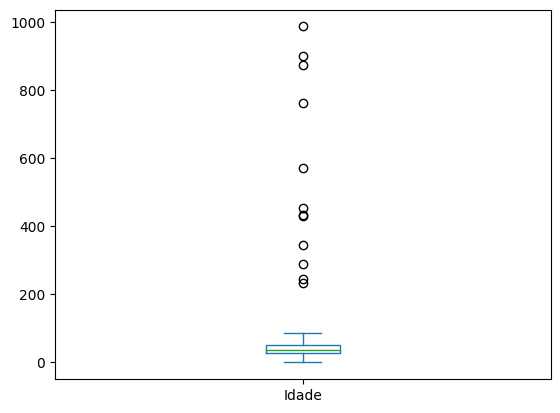

In [ ]:
# Gráfico boxplot para verificar se existem outliers na coluna de idade
dados['Idade'].plot.box()
plt.show()


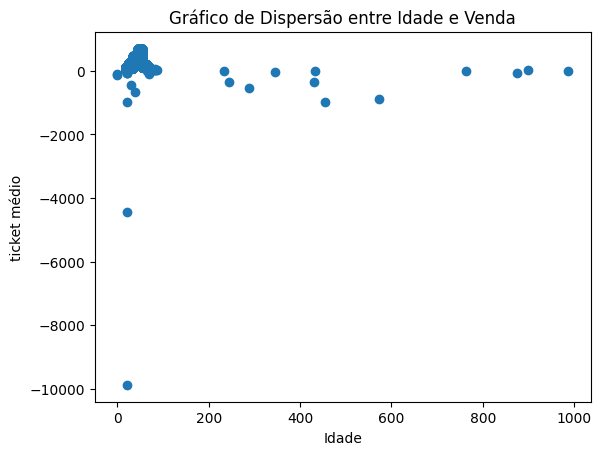

In [ ]:
# Gráfico de dispersão cruzando as colunas 'idade' e 'valor ticket médio' para verificar se existe alguma relação
plt.scatter(dados['Idade'], dados['valor ticket médio'])
plt.title('Gráfico de Dispersão entre Idade e Venda')
plt.xlabel('Idade')
plt.ylabel('ticket médio')

# Mostrar o gráfico
plt.show()

In [ ]:
# Verificando maior valor da coluna idade
dados['Idade'].max()

987

In [ ]:
# Verificando maior valor da coluna idade
dados['Idade'].min()

0

In [ ]:
# Verificando menor valor da coluna valor ticket médio
dados['valor ticket médio'].min()

-9876.0

In [ ]:
# Verificando maior valor da coluna valor ticket médio
dados['valor ticket médio'].max()

690.0

In [ ]:
# Mostrando relação existente entre as colunas idade e valor ticket médio
relacao = dados[['Idade','valor ticket médio']]
relacao[relacao['Idade'] >= 200]
# Essa relação é possível identificar uma relação de valor ticket médio com os
# outliers da coluna idade que quando ocorre uma idade discrepante ela está relacionado a um outlier da coluna valor ticket médio

,Idade,valor ticket médio
9525,244,-345.0
9546,345,-22.0
9805,455,-987.0
10246,289,-542.0
10708,431,-341.0
12422,572,-872.0
13494,763,0.0
14475,987,0.0
15680,233,0.0
16409,433,-2.0


## Remoção dos outliers: Utilizamos o critério de identificação do boxplot foi feita a separação dos quartis Q1 e Q3 dos dados da idade. Q1 é o valor abaixo do qual está o 25% inferior dos dados, enquanto Q3 é o valor abaixo do qual está os 75% inferior dos dados.

##Foi feito o intervalo interquartil(IQR): Ele é calculado subtraindo Q1 de Q3.Ele fornece uma medida da dispersão dos dados, considerando apenas os valores centrais.
## Calculamos o limite inferior e superior: Os limites inferior e superior são calculados usando o IQR. O limite inferior é calculado subtraindo 1.5 vezes o IQR de Q1, enquanto o limite superior é calculado adicionando 1.5 vezes o IQR a Q3.

In [ ]:
# Criando os limites dos quantils da coluna idade
QIdade1 = dados['Idade'].quantile(0.25)
QIdade3 = dados['Idade'].quantile(0.75)
#Calculando o IRQ
IQRIdade = QIdade3 - QIdade1

# Intervalo inferior do quartil
lower_boundIdade = QIdade1 - 1.5 * IQRIdade

# Intervalo superior do quartil
upper_boundIdade = QIdade3 + 1.5 * IQRIdade


In [ ]:
# Filtrando os dados e armazenando em uma nova variável
dados_filtered = dados[
    ((dados['Idade'] >= lower_boundIdade) & (dados['Idade'] <= upper_boundIdade) & (dados['Idade'] != 0)) &
    (dados['valor ticket médio'] >= 0)
]

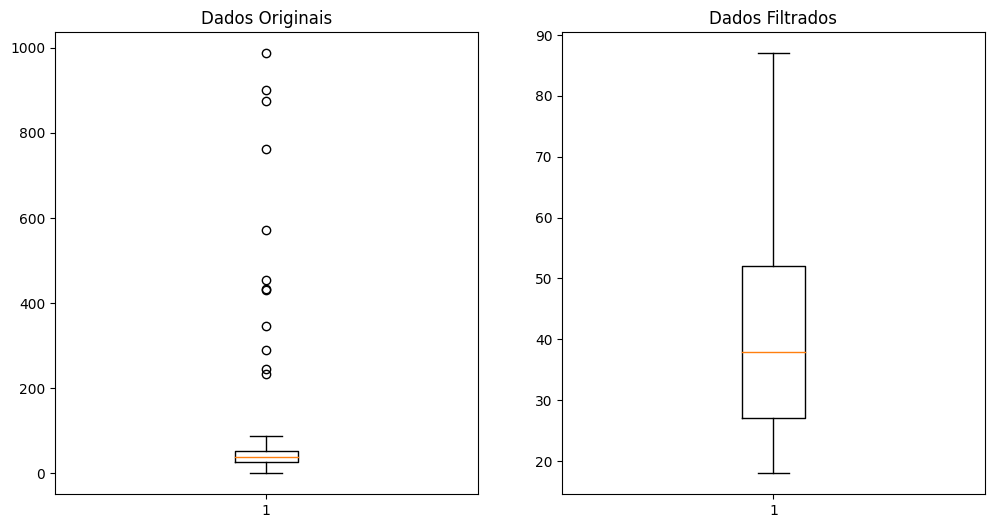

In [ ]:
# Gráfico mostrando o antes de tratar os dados e depois de tratar os dados da coluna idade
# Dados originais
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(dados['Idade'])
plt.title('Dados Originais')

# Dados filtrados
plt.subplot(1, 2, 2)
plt.boxplot(dados_filtered['Idade'])
plt.title('Dados Filtrados')

plt.show()


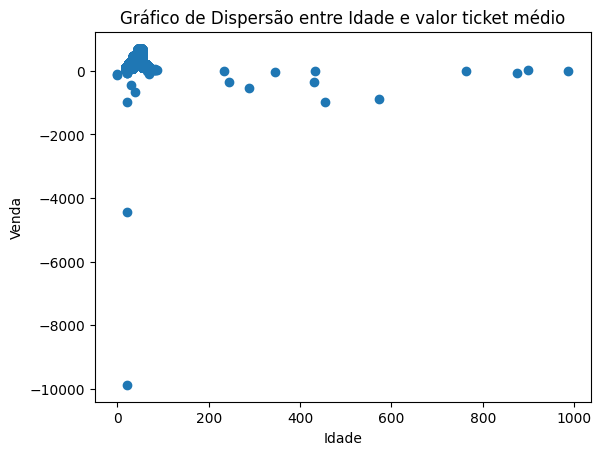

In [ ]:
# Gráfico dispersão entre as colunas idade e valor tcket médio
plt.scatter(dados['Idade'], dados['valor ticket médio'])
plt.title('Gráfico de Dispersão entre Idade e valor ticket médio')
plt.xlabel('Idade')
plt.ylabel('Venda')

# Mostrar o gráfico
plt.show()

In [ ]:
display(dados_filtered)

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102.0,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32.0,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101.0,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70.0,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67.0,38416338
...,...,...,...,...,...,...,...,...
47830,Sudeste,São Paulo,2024-02-29,Pix,M,58,178.0,38547192
47831,Sudeste,Minas Gerais,2024-03-23,Dinheiro,M,47,490.0,38286005
47832,Sudeste,Rio de Janeiro,2024-01-11,Cartão Débito,F,52,690.0,37717645
47833,Sudeste,Espírito Santo,2024-01-25,Cartão Débito,M,34,188.0,35803326


Text(0.5, 1.0, 'Boxplot')

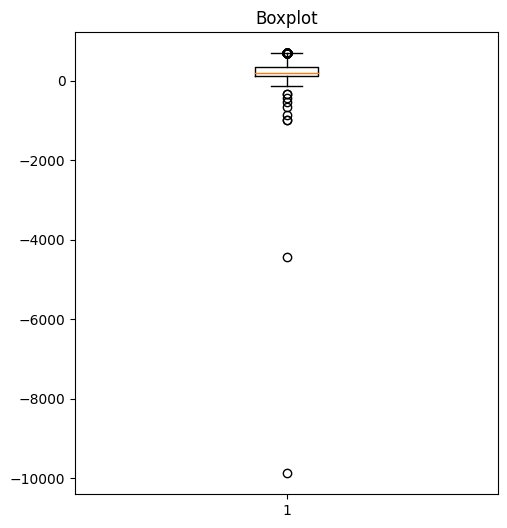

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(dados['valor ticket médio'])
plt.title('Boxplot')

In [ ]:
dados_filtered['valor ticket médio'].max()

690.0

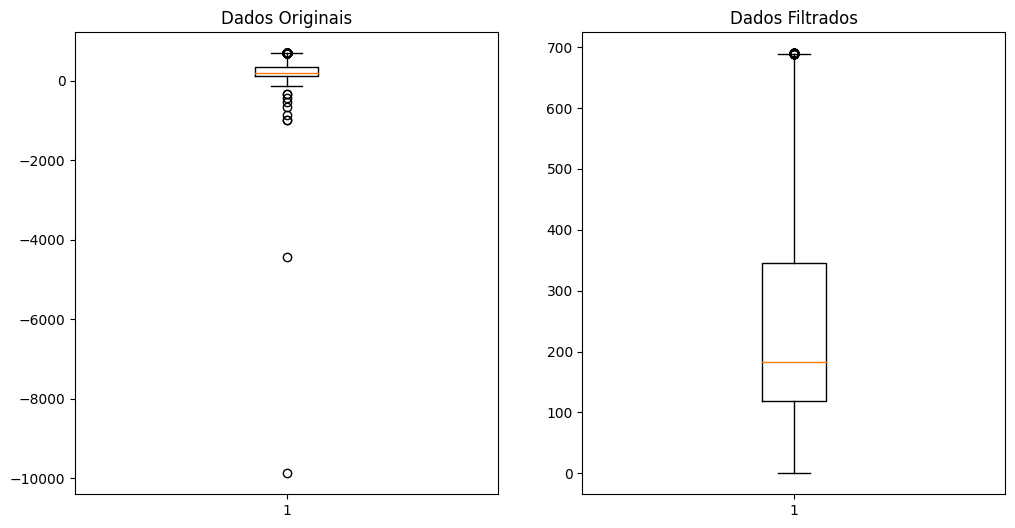

In [ ]:
# Gráfico mostrando o antes de tratar os dados e depois de tratar os dados da coluna valor ticket médio
# Dados originais
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(dados['valor ticket médio'])
plt.title('Dados Originais')

# Dados filtrados
plt.subplot(1, 2, 2)
plt.boxplot(dados_filtered['valor ticket médio'])
plt.title('Dados Filtrados')

plt.show()


In [ ]:
# Removendo outliers das colunas idade e valor ticket médio
dados = dados[
    ((dados['Idade'] >= lower_boundIdade) & (dados['Idade'] <= upper_boundIdade) & (dados['Idade'] != 0)) &
    (dados['valor ticket médio'] >= 0)
]

In [ ]:
# Tabela de frequência de faixa etária

# 1 CRIANDO A LISTAGEM PARA O DAS IDADES

dados = pd.DataFrame(dados)
coluna_idade = 'Idade'
faixas_etarias = {
    'Grupo': ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    'Frequencia': [0, 0, 0, 0, 0, 0]
}
faixas_etarias = [18, 25, 35, 45, 55, 65, float('inf')]

# Criando as faixas etárias automaticamente
faixas_etarias_rotulos = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
dados['faixa_etaria'] = pd.cut(dados[coluna_idade], bins=faixas_etarias, labels=faixas_etarias_rotulos, right=False)

# Contando a frequência de cada faixa etária
frequencia_faixas_etarias = dados['faixa_etaria'].value_counts().sort_index()

# Criando DataFrame a partir da frequência das faixas etárias
faixas_etarias_df = pd.DataFrame({'Grupo': frequencia_faixas_etarias.index, 'Frequencia': frequencia_faixas_etarias.values})

# Exibindo o DataFrame
faixas_etarias_df


,Grupo,Frequencia
0,18-24,8456
1,25-34,12512
2,35-44,9458
3,45-54,7816
4,55-64,8588
5,65+,978


In [ ]:
dados

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido,faixa_etaria
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102.0,37380646,18-24
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32.0,35870530,18-24
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101.0,38158515,18-24
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70.0,36341482,18-24
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67.0,38416338,18-24
...,...,...,...,...,...,...,...,...,...
47830,Sudeste,São Paulo,2024-02-29,Pix,M,58,178.0,38547192,55-64
47831,Sudeste,Minas Gerais,2024-03-23,Dinheiro,M,47,490.0,38286005,45-54
47832,Sudeste,Rio de Janeiro,2024-01-11,Cartão Débito,F,52,690.0,37717645,45-54
47833,Sudeste,Espírito Santo,2024-01-25,Cartão Débito,M,34,188.0,35803326,25-34


In [ ]:
# TROCANDO O NOME DA COLUNA VALOR TICKET MÉDIO
dados.rename(columns={'valor ticket médio': 'valor_ticket_medio'}, inplace=True)


In [ ]:
dados

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor_ticket_medio,numero pedido,faixa_etaria
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102.0,37380646,18-24
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32.0,35870530,18-24
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101.0,38158515,18-24
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70.0,36341482,18-24
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67.0,38416338,18-24
...,...,...,...,...,...,...,...,...,...
47830,Sudeste,São Paulo,2024-02-29,Pix,M,58,178.0,38547192,55-64
47831,Sudeste,Minas Gerais,2024-03-23,Dinheiro,M,47,490.0,38286005,45-54
47832,Sudeste,Rio de Janeiro,2024-01-11,Cartão Débito,F,52,690.0,37717645,45-54
47833,Sudeste,Espírito Santo,2024-01-25,Cartão Débito,M,34,188.0,35803326,25-34


In [ ]:
# 2. Definindo a coluna que contém as idades
coluna_idade = 'Idade'

# 3. Definindo os limites das faixas etárias
faixas_etarias = [18, 25, 35, 45, 55, 65, float('inf')]

# 4. Criando rótulos para as faixas etárias
faixas_etarias_rotulos = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# 5. Criando uma nova coluna 'faixa_etaria' no DataFrame com base na coluna de idades
dados['faixa_etaria'] = pd.cut(dados[coluna_idade], bins=faixas_etarias, labels=faixas_etarias_rotulos, right=False)

# 6. Contando a frequência de cada faixa etária
frequencia_faixas_etarias = dados['faixa_etaria'].value_counts().sort_index()

# 7. Calculando a média do valor do ticket médio para cada faixa etária
# Supondo que a coluna que contém o valor do ticket médio é chamada 'valor_ticket_medio'
media_valor_ticket_medio_faixas_etarias = dados.groupby('faixa_etaria')['valor_ticket_medio'].mean().sort_index()

# 8. Criando DataFrame a partir da frequência e da média do valor do ticket médio das faixas etárias
faixas_etarias_df = pd.DataFrame({
    'Grupo': frequencia_faixas_etarias.index,
    'Frequencia': frequencia_faixas_etarias.values,
    'Media_Valor_Ticket_Medio': media_valor_ticket_medio_faixas_etarias.values
})

# 9. Exibindo o DataFrame
faixas_etarias_df


,Grupo,Frequencia,Media_Valor_Ticket_Medio
0,18-24,8456,67.490184
1,25-34,12512,170.556666
2,35-44,9458,356.403997
3,45-54,7816,490.231832
4,55-64,8588,153.301118
5,65+,978,106.955010


<ipython-input-272-e95755d8ff6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grupo', y='Frequencia', data=faixas_etarias_df, ax=ax1, palette='viridis')


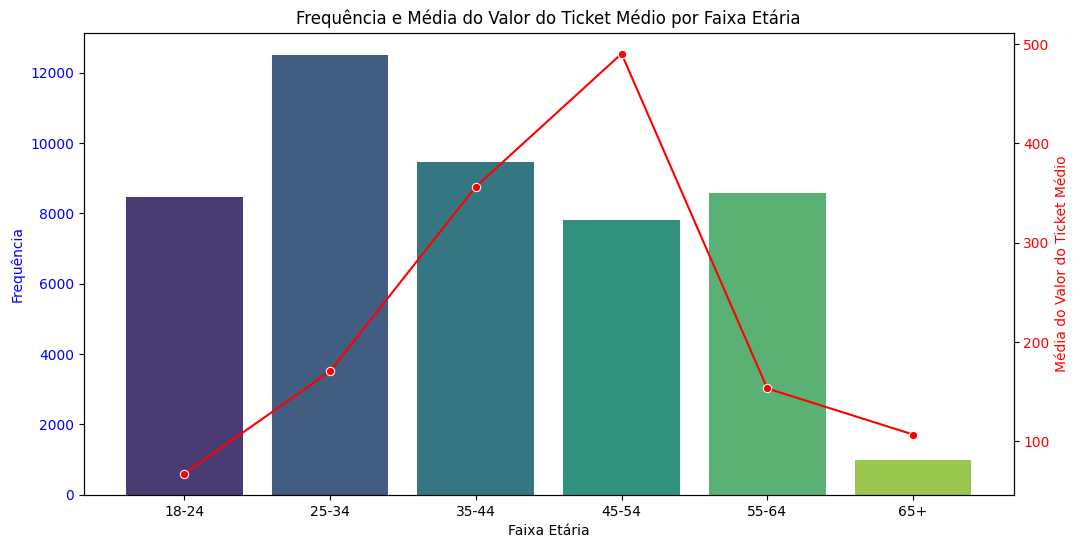

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de Barras para Frequência
sns.barplot(x='Grupo', y='Frequencia', data=faixas_etarias_df, ax=ax1, palette='viridis')
ax1.set_xlabel('Faixa Etária')
ax1.set_ylabel('Frequência', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Criando o segundo eixo y para o gráfico de linhas
ax2 = ax1.twinx()
sns.lineplot(x='Grupo', y='Media_Valor_Ticket_Medio', data=faixas_etarias_df, ax=ax2, marker='o', color='r')
ax2.set_ylabel('Média do Valor do Ticket Médio', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título do gráfico
plt.title('Frequência e Média do Valor do Ticket Médio por Faixa Etária')

# Exibindo o gráfico
plt.show()

In [ ]:
# CALCULANDO A IDADE MEDIA DOS CLIENTES

dados ['Idade'].mean()

# A idade média é aproximadamente 39 anos

39.36464608433735

In [ ]:
# CALCULANDO A IDADE MEDIANA DOS CLIENTES

dados ['Idade'].median()

# A idade mediana é aproximadamente 38 anos

38.0

In [ ]:
# CALCULANDO A VARIANCIA NA IDADE DOS CLIENTES

dados ['Idade'].var()

# A variância idade dos clientes é de 195.28

195.28571390825084

In [ ]:
# CALCULANDO O DESVIO PADRÃO NA IDADE DOS CLIENTES USANDO NUMPY

idade=np.std(dados['Idade'])

idade
# O desvio padrão na idade dos clientes é de 13.9 ou aproximadamente 14

13.974320345430456

In [ ]:
# CALCULANDO O VALOR MÉDIO POR FAIXA ETÁRIA

media_faixa_etaria = dados.groupby('faixa_etaria')['Idade'].mean().sort_index()
faixas_etarias_df = pd.DataFrame({
    'Grupo': frequencia_faixas_etarias.index,
    'Media_Idade_Faixa_Etaria': media_faixa_etaria.values,
})

# 9. Exibindo o DataFrame
faixas_etarias_df

,Grupo,Media_Idade_Faixa_Etaria
0,18-24,21.217952
1,25-34,29.418558
2,35-44,39.310002
3,45-54,49.634340
4,55-64,59.459013
5,65+,65.512270


In [ ]:
# CALCULANDO A MEDIANA POR FAIXA ETÁRIA

mediana_faixa_etaria = dados.groupby('faixa_etaria')['Idade'].median().sort_index()
faixas_etarias_df = pd.DataFrame({
    'Grupo': frequencia_faixas_etarias.index,
    'Mediana_Idade_Faixa_Etaria': mediana_faixa_etaria.values,
})

# EXIBINDO
faixas_etarias_df

,Grupo,Mediana_Idade_Faixa_Etaria
0,18-24,21.0
1,25-34,29.0
2,35-44,39.0
3,45-54,50.0
4,55-64,59.0
5,65+,65.0


In [ ]:
# RANKING DE VENDAS POR FAIXA ETÁRIA

pedidos_faixa_etaria = dados.groupby('faixa_etaria')['numero pedido'].count()
ranking_faixa_etaria = pd.DataFrame({
    'Grupo': frequencia_faixas_etarias.index,
    'Ranking_faixa_etaria': pedidos_faixa_etaria.values
})

# ORDENANDO DO MAIOR PARA O MENOR
ranking_faixa_etaria = ranking_faixa_etaria.sort_values(by='Ranking_faixa_etaria', ascending=False)

# EXIBINDO O DF
ranking_faixa_etaria

,Grupo,Ranking_faixa_etaria
1,25-34,12512
2,35-44,9458
4,55-64,8588
0,18-24,8456
3,45-54,7816
5,65+,978


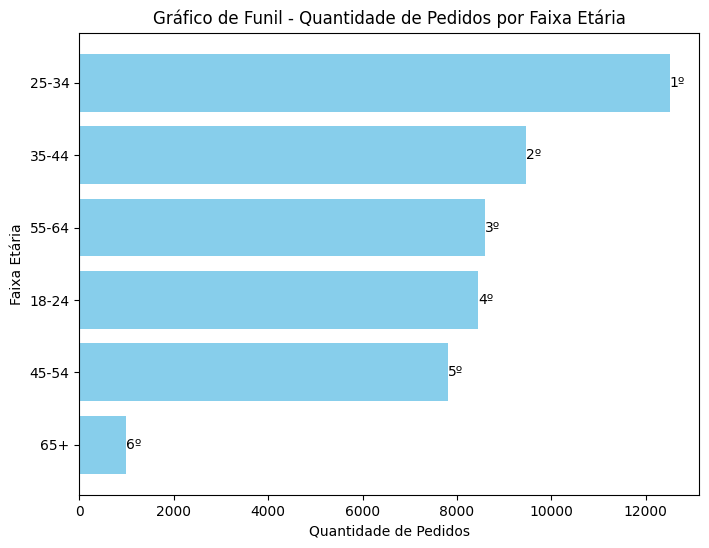

In [ ]:
# INSERINDO OS DADOS PARA O GRÁFICO
grupos = ranking_faixa_etaria['Grupo']
valores = ranking_faixa_etaria['Ranking_faixa_etaria']

# CRIANDO O GRAFICO DE FUNIL PARA MELHOR VISUALIZAÇÃO DO RANQUEAMENTO
plt.figure(figsize=(8, 6))
plt.barh(grupos, valores, color='skyblue')
plt.xlabel('Quantidade de Pedidos')
plt.ylabel('Faixa Etária')
plt.title('Gráfico de Funil - Quantidade de Pedidos por Faixa Etária')

# COLOCANDO OS NÚMEROS DA CLASSIFICAÇÃO EM CADA BARRA
for i, (grupo, valor) in enumerate(zip(grupos, valores)):
    plt.text(valor, i, f"{i+1}º", ha='left', va='center')

plt.gca().invert_yaxis() # INVERTENDO PARA O TOPO SER A FAIXA ETARIA COM MAIS PEDIDOS
plt.show()
